<a href="https://colab.research.google.com/github/allgoodman/Ecommerce_Linear_Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.chdir("/content/gdrive/MyDrive/Colab Notebooks/Data")
os.getcwd()

'/content/gdrive/MyDrive/Colab Notebooks/Data'

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
customers = pd.read_csv('LR_data.csv')
customers.head(10)
# Avg. Session Length: Average session of in-store style advice sessions.
# Time on App: Average time spent on App in minutes
# Time on Website: Average time spent on Website in minutes
# Length of Membership: How many years the customer has been a member.

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,DPO AP 09026-4941,NaN,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
1,APO AA 98456-7482,NaN,Brown,31.936549,11.814128,37.145168,3.202806,427.199385
2,DPO AA 07580-2652,NaN,Tomato,33.879361,11.584783,37.087926,3.713209,522.337405
3,APO AE 15445-2876,NaN,Black,33.503087,12.877984,37.441021,1.559152,419.938775
4,APO AA 74738,NaN,Olive,31.531604,13.378563,38.734006,2.245148,436.515606
5,FPO AA 85439-9449,NaN,Silver,32.903251,11.657576,36.772604,3.919302,519.340989
6,FPO AA 26496,NaN,DarkMagenta,32.175501,13.387492,35.694175,4.343063,588.712605
7,FPO AE 32122-5711,NaN,Snow,32.044486,13.414935,36.112435,2.258686,448.229829
8,APO AA 55271-2375,NaN,DarkOliveGreen,34.390164,12.645195,38.468321,2.874597,522.404141
9,FPO AA 73568-0730,NaN,Olive,33.754995,12.064157,37.271222,3.970556,547.365141


In [8]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Data Exploration

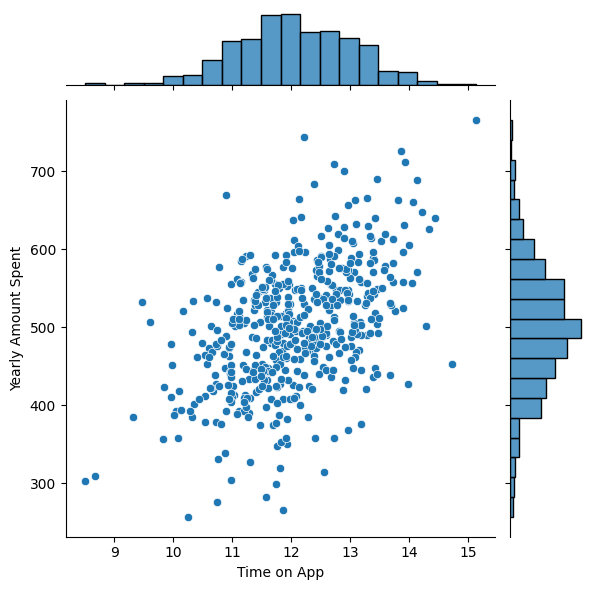

In [10]:
sns.jointplot(x='Time on App',y ='Yearly Amount Spent', data = customers)

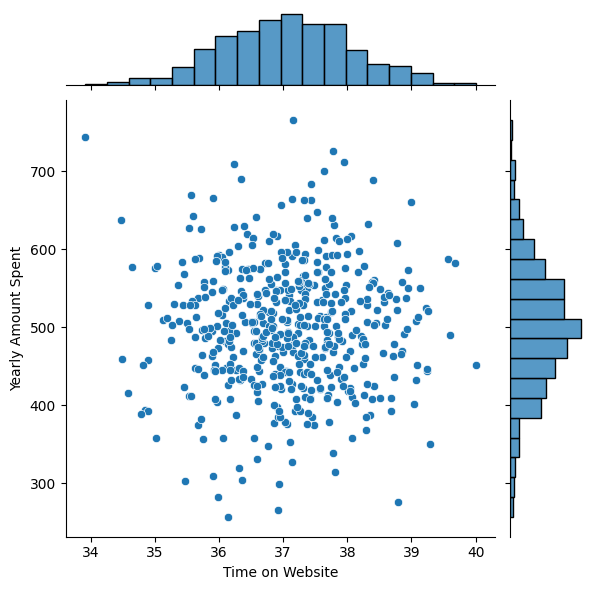

In [11]:
sns.jointplot(x='Time on Website',y ='Yearly Amount Spent', data = customers)

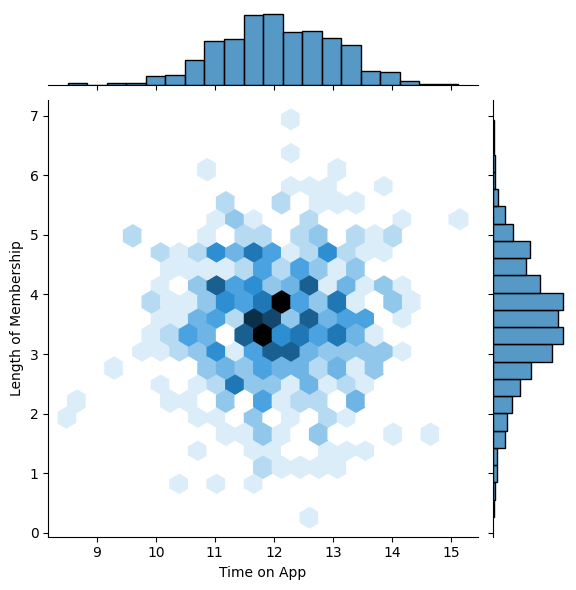

In [12]:
sns.jointplot(x='Time on App',y ='Length of Membership', data = customers, kind='hex')

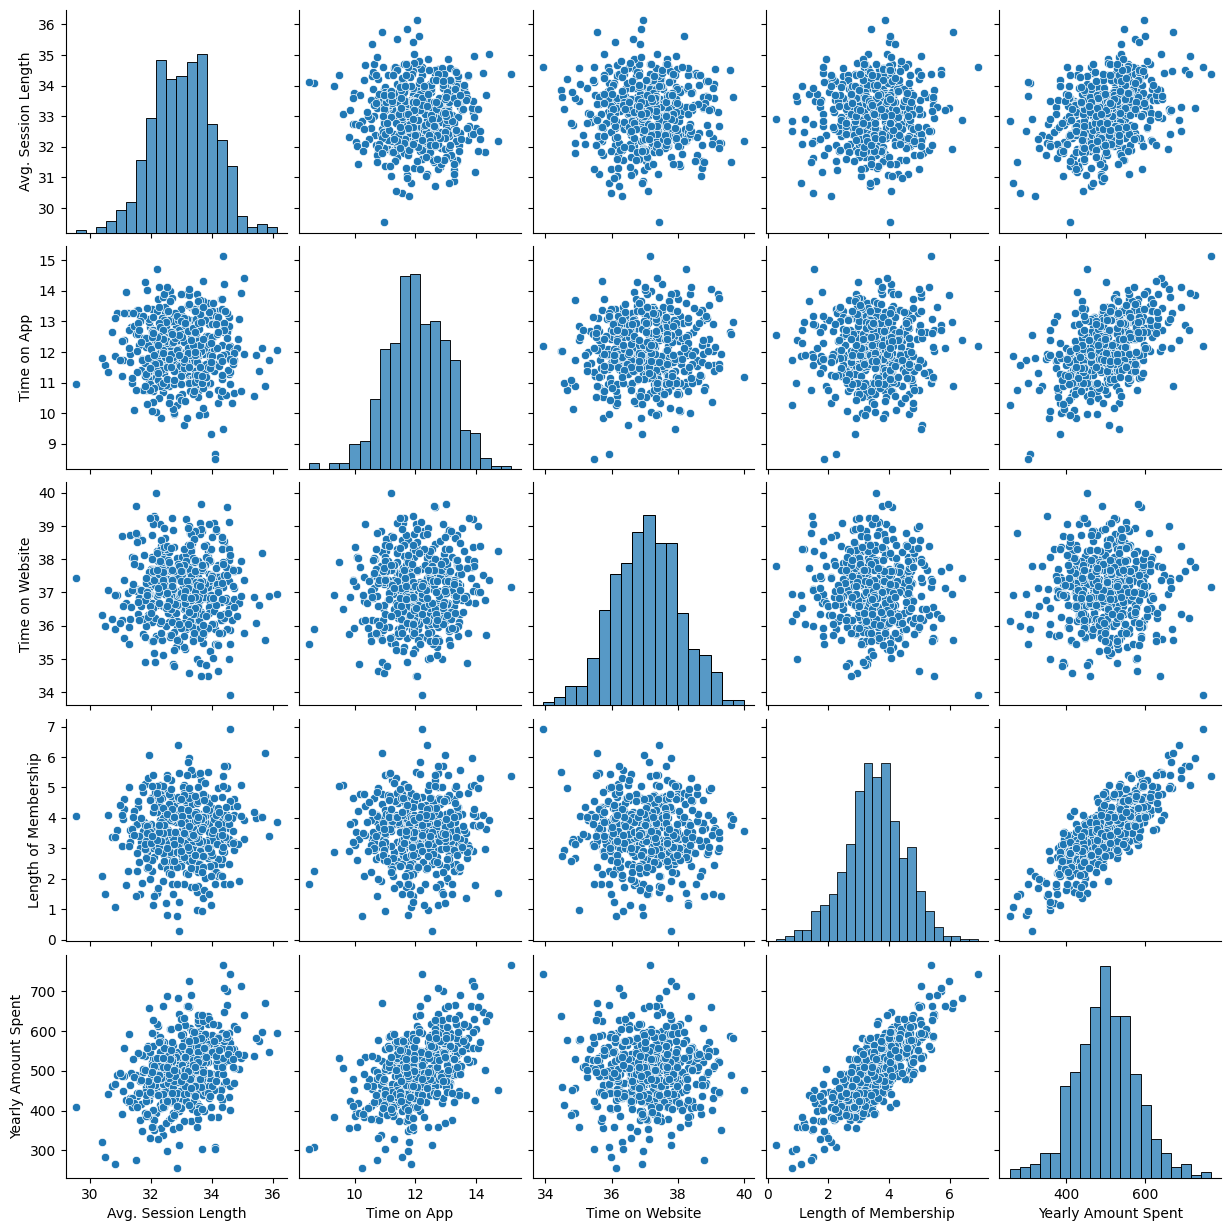

In [13]:
sns.pairplot(customers)

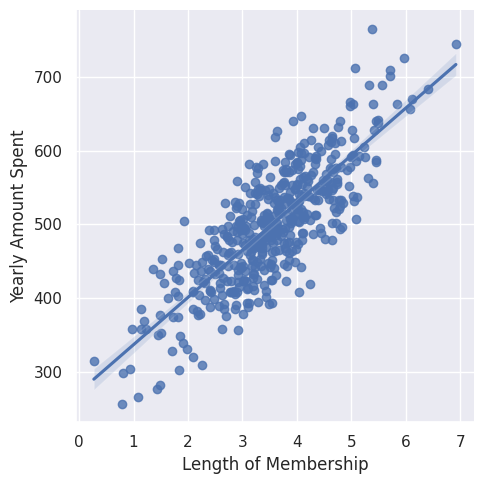

In [14]:
sns.set(color_codes=True)
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=customers)

# Model Development

In [ ]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y= customers['Yearly Amount Spent']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1008)

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [24]:
predictions = lm.predict(X_test)

Text(0.5, 0, 'Y test')

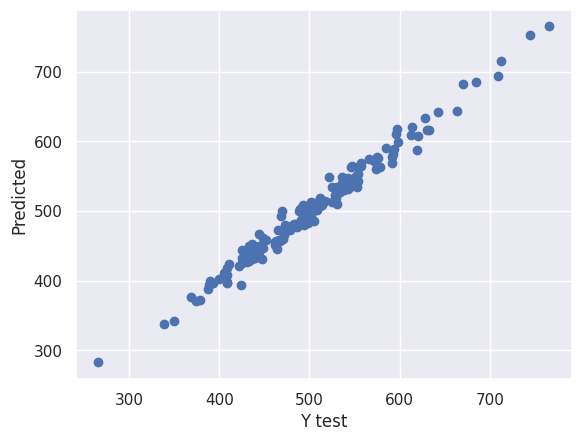

In [25]:
plt.pyplot.scatter(y_test, predictions)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Y test')

In [28]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
print('R^2: {}'.format(metrics.r2_score(y_test,predictions)))

MAE: 8.500404067271923
MSE: 116.13144300268556
RMSE: 10.776429974842575
R^2: 0.9819794540857533


# Normality of Errors

<ipython-input-30-550730dc5ec8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions))


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

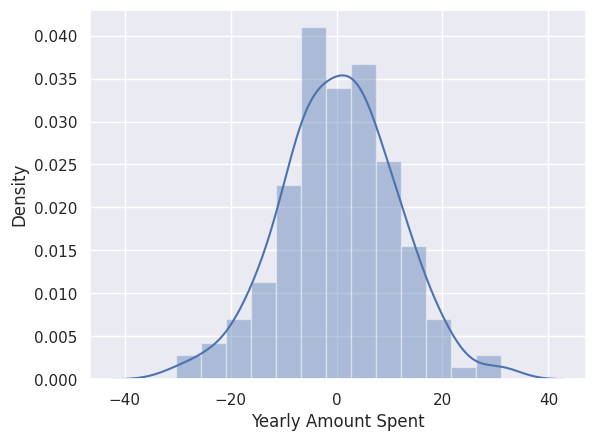

In [30]:
sns.distplot((y_test-predictions))

In [32]:
pd.DataFrame(lm.coef_ , X.columns, columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,25.855800
Time on App,38.278732
Time on Website,0.519766
Length of Membership,61.732661


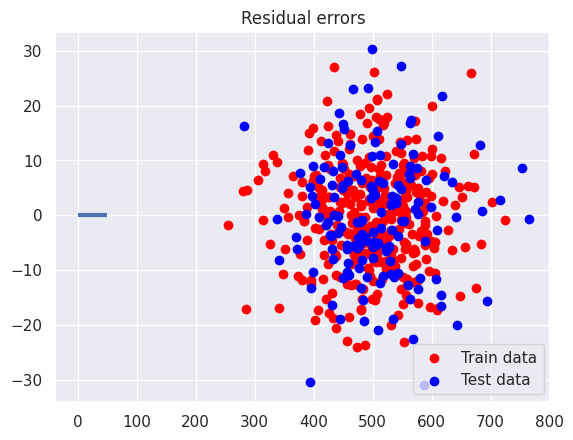

In [47]:
# Plotting residual errors
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

In [37]:
# Checking for Overfitting or Underfitting the data
print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))
print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

Training set score: 0.9852
Test set score: 0.9820


# Saving the model

In [44]:
# Save model for future use

import joblib
joblib.dump(lm, 'lm_regressor.pkl')

# To load the model
# lm2=joblib.load('lm_regressor.pkl')

['lm_regressor.pkl']

# Implementing OLS model

In [48]:
import statsmodels.api as sm
from scipy import stats
X_train2 = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5760.
Date:                 Fri, 28 Jul 2023   Prob (F-statistic):          2.31e-314
Time:                         11:28:59   Log-Likelihood:                -1286.5
No. Observations:                  350   AIC:                             2583.
Df Residuals:                      345   BIC:                             2602.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1054.1761     26.568    -39.678      0.000   -1106.432   -1001.920
Avg. Session Length     25.8558      0.532     48.630      0.000      24.810      26.902
Time on App             38.2787      0.517     74.006      0.000      37.261      39.296
Time on Website          0.5198      0.509      1.022      0.307      -0.480       1.520
Length of Membership    61.7327      0.522    118.180      0.000      60.705      62.760
==============================================================================
Omnibus:                        0.069   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.172
Skew:                          -0.002   Prob(JB):                        0.918
Kurtosis:                       2.892   Cond. No.                     2.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Checking VIF

In [52]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [65]:
# X = X.iloc[:,:-1]
calc_vif(X_train2)

,variables,VIF
0,const,2668.967960
1,Avg. Session Length,1.003751
2,Time on App,1.007798
3,Time on Website,1.005312
4,Length of Membership,1.004572


In [66]:
X.corr()

,Avg. Session Length,Time on App,Length of Membership
Avg. Session Length,1.000000,-0.027826,0.060247
Time on App,-0.027826,1.000000,0.029143
Length of Membership,0.060247,0.029143,1.000000


# Final Model

In [62]:
X = customers[['Avg. Session Length', 'Time on App', 'Length of Membership']]
y= customers['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1008)

In [63]:
lmt = LinearRegression()
lmt.fit(X_train, y_train)
predictions = lmt.predict(X_test)
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
print('R^2: {}'.format(metrics.r2_score(y_test,predictions)))

MAE: 8.508722518197532
MSE: 116.1740761736638
RMSE: 10.778407868218006
R^2: 0.9819728385387901
